Dieser Quellcode ist Bestandteil der Dissertation von Elisa Henke vorgelegt an der Medizinischen Fakultät Carl Gustav Carus der Technischen Universität Dresden.

Dieser Code enthält die Visualisierung der Zuordnung der identifizierten Prozessschritte zu den eingeschlossenen Publikationen als Scatterplot in Kombination mit einem Histogramm zur Anzeige der Häufigkeit der Prozessschritte.

Dieser Code ist in Anlehnung an die Visualisierung von Ines Reinecke implementiert wurden (inesreinecke. (2023). inesreinecke/dissertation-code: diss-release (diss). Zenodo. https://doi.org/10.5281/zenodo.8127650).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from collections import Counter
import itertools

In [4]:
# csv-Datei einlesen
df = pd.read_csv('Review_OMOP_process_python_prep.csv',skipinitialspace=True, sep=";")

hfont = {'fontname':'Open Sans'}

In [5]:
# Reduzieren der Spalten im Dataframe df, nur die relevanten Spalten behalten
df_sub = df[["author_et_al","publication_year","title","dataset_specification","data_profiling","vocabulary_identification","coverage_analysis_vocabularies", "etl", "semantic_mapping", "structural_mapping", "qualitative_data_quality_analysis", "quantitative_data_quality_analysis"]]

# Benennung der Spalten für die Prozessschritte in deutsch anpassen
names_columns = ["author_et_al", "publication_year", "title", "Datensatzspezifikation", "Datenprofilierung", "Vokabularidentifikation", "Abdeckungsgradanalyse Vokabulare", "ETL-Prozess", "Semantisches Mapping", "Strukturelles Mapping", "Qualitative Datenqualitätsanalyse", "Quantitative Datenqualitätsanalyse"]

# Spaltennamen im DataFrame ändern
df_sub.columns = names_columns

In [6]:
# Zählen der "yes"-Angaben für das Vorliegen eines Prozessschrittes
yes_counts = df_sub.iloc[:, 3:].apply(lambda col: (col == 'yes').sum(), axis=0)
sorted_columns = yes_counts.sort_values(ascending=False).index

# DataFrame nach den sortierten Spalten neu ordnen
df_sort_col = df_sub.iloc[:, :3].join(df_sub[sorted_columns])

In [7]:
df_sort_col

,author_et_al,publication_year,title,ETL-Prozess,Semantisches Mapping,Strukturelles Mapping,Vokabularidentifikation,Datensatzspezifikation,Qualitative Datenqualitätsanalyse,Quantitative Datenqualitätsanalyse,Datenprofilierung,Abdeckungsgradanalyse Vokabulare
0,"Lamer et al., 2021",2021,Transforming Anesthesia Data Into the Observat...,yes,yes,yes,yes,yes,no,no,no,no
1,"Hripcsak et al., 2019",2019,Facilitating phenotype transfer using a common...,yes,yes,yes,yes,yes,no,no,no,no
2,"Klann et al., 2019",2019,Data model harmonization for the All Of Us Res...,yes,yes,yes,yes,no,yes,no,no,yes
3,"Yu et al., 2023",2023,Integrating real-world data to assess cardiac ...,yes,yes,yes,no,yes,yes,yes,no,no
4,"Papez et al., 2021",2021,Transforming and evaluating electronic health ...,yes,yes,yes,yes,yes,yes,yes,yes,no
5,"Tan et al., 2022",2022,Applying the OMOP Common Data Model to Facilit...,yes,yes,yes,yes,no,no,yes,yes,no
6,"Papez et al., 2022",2022,Transforming and evaluating the UK Biobank to ...,yes,yes,yes,yes,yes,yes,yes,yes,yes
7,"Jung et al., 2022",2022,Patient-Level Fall Risk Prediction Using the O...,yes,yes,yes,yes,yes,yes,no,no,yes
8,"Almeida et al., 2021",2021,A two-stage workflow to extract and harmonize ...,yes,yes,yes,yes,yes,no,no,no,yes
9,"Lima et al., 2019",2019,Transforming Two Decades of ePR Data to OMOP C...,yes,yes,yes,yes,no,yes,yes,yes,yes


In [8]:
# Sortieren der Daten nach Jahren und Autor
df_sorted = df_sort_col.sort_values(by=['publication_year', 'author_et_al'], ascending=False)


# Extrahieren der sortierten Jahre und Namen
years_sorted = df_sorted['publication_year'].values
names_sorted = df_sorted['author_et_al'].values

# Erstellen einer Liste von Spaltennamen für die weitere Verarbeitung
columns = df_sorted.columns[3:12]

# Erstellen des sortierten Arrays basierend auf den Spaltenwerten
arr_sorted = df_sorted[columns].values.T

# Generierung der x- und y-Daten für den Scatterplot
x = np.repeat(np.arange(len(years_sorted)), len(columns))
y = np.zeros(len(x), dtype=int)

# Erstellen der x_hist_cols für das Balkendiagramm
x_hist_cols = [list(group) for key, group in itertools.groupby(x)]

# Zuweisen der Werte an y basierend auf den Spaltenwerten
for i, col in enumerate(arr_sorted):
    for j, val in enumerate(col):
        if val != 'no':
            y[i * len(years_sorted) + j] = j + 1

# Aufteilen von x und y in Spalten
x_cols = np.split(x, len(columns))
y_cols = np.split(y, len(columns))

y_cols = []
for col in df_sorted.columns[4:]:
    y_col = np.where(df_sorted[col] == 'yes', 1, 0)
    y_cols.append(y_col)

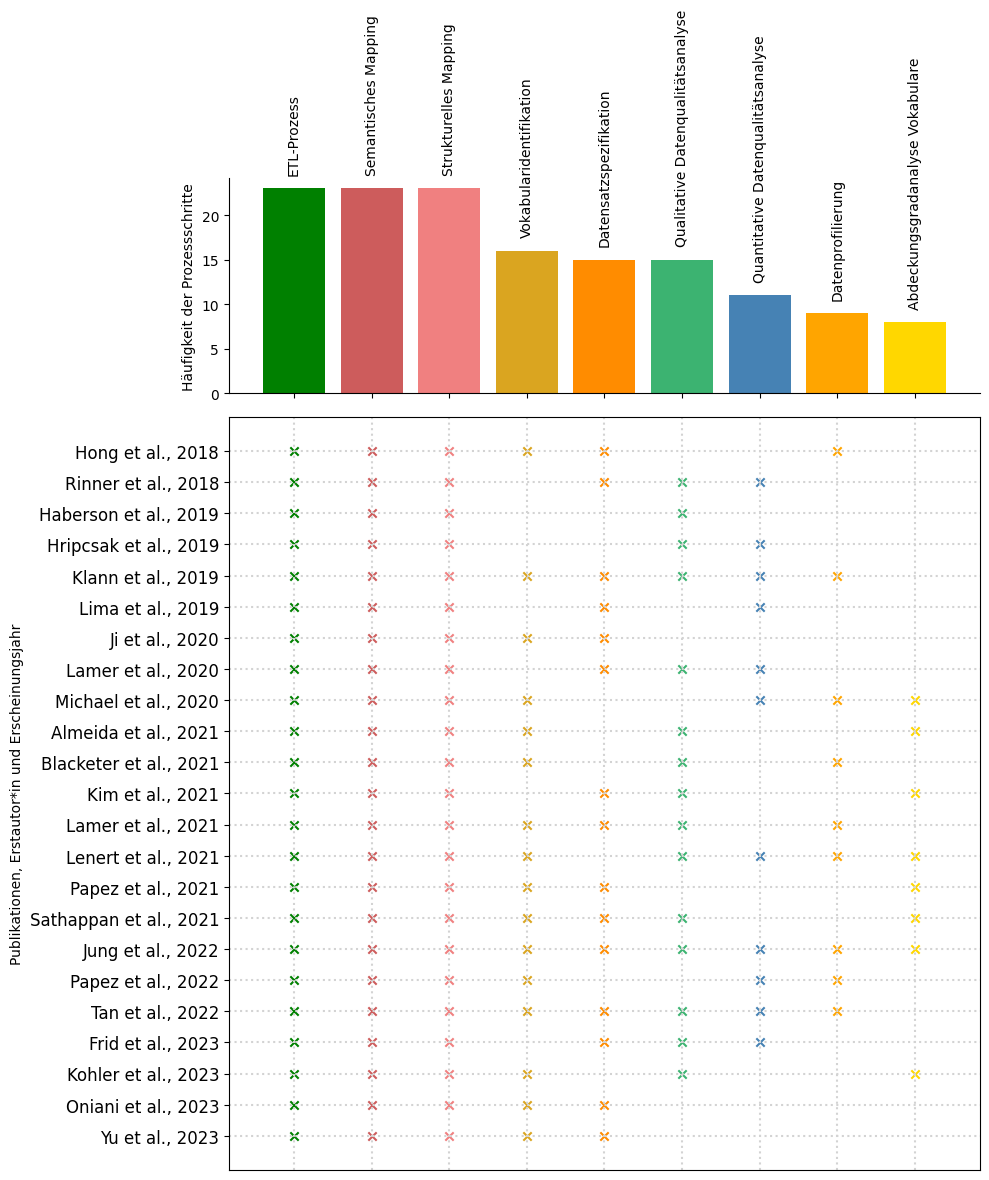

In [9]:
# Generierung der Farbpalette
color_palette = ["green", "indianred", "lightcoral", "goldenrod", "darkorange", "mediumseagreen", "steelblue", "orange", "gold"]

# Erstellen der Figure und Axes
fig, (ax_hist, ax_scatter) = plt.subplots(nrows=2, ncols=1, sharex=True,gridspec_kw={'height_ratios': [2, 7]}, figsize=(10, 12))

# Histogramm erstellen
column_sums = [np.sum(df_sorted[col] == 'yes') for col in columns]
x_ticks = np.arange(len(columns)) + 5
y_ticks = np.arange(len(df_sorted))

bars = ax_hist.bar(x_ticks, column_sums, color=color_palette)

# Summen innerhalb der Balken hinzufügen
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax_hist.text(bar.get_x() + bar.get_width() / 2,height+1.5, str(columns[i]), ha='center', va='bottom', color='black', rotation='vertical')

# Achsenbeschriftungen und Titel für Histogramm
ax_hist.set_ylabel('Häufigkeit der Prozessschritte')

# Scatterplot erstellen
for i, name in enumerate(names_sorted):
    y = i + 1
    for j, col in enumerate(columns):
        x = j + 5
        if df_sorted.loc[i, col] == 'yes':
            ax_scatter.scatter(x, y, marker='x', color=color_palette[j])

# Achsenbeschriftungen und Titel für Scatterplot
ax_scatter.set_ylabel('Publikationen, Erstautor*in und Erscheinungsjahr')

# Anpassungen an den Achsenbeschriftungen
ax_scatter.set_xticks(x_ticks)
ax_scatter.set(xticklabels=[])
ax_scatter.tick_params(bottom=False)

# Senkrechte Rasterlinien hinzufügen
for x in x_ticks:
    ax_scatter.axvline(x, color='lightgray', linestyle='dotted')

# Waagerechte gestrichelte Rasterlinien hinzufügen
for y in range(1, len(names_sorted) + 1):
    ax_scatter.axhline(y, color='lightgray', linestyle='dotted')

# Anpassungen an den Achsenbeschriftungen
ax_scatter.set_yticks(np.arange(1, len(names_sorted)+1))
ax_scatter.set_yticklabels(names_sorted, fontsize=12)


# Linien oben und rechts entfernen
ax_hist.spines['top'].set_visible(False)
ax_hist.spines['right'].set_visible(False)

# Layout anpassen
plt.tight_layout()

# Plot speichern
plt.savefig('omop_process', bbox_inches='tight')

# Plot anzeigen
plt.show()
